## Analyzing the learning and performance of a model

In [2]:
from data_preparation import downloadData, loadData

train, test = downloadData(download=False)
train_l, test_l = loadData(train, test)
classes_names=train_l.dataset.classes
print(classes_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
train_iter=iter(train_l)
test_iter=iter(test_l)

#### Looking at some images

In [5]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

def show_image():
    images, labels = train_iter.next()
    images=torchvision.utils.make_grid(images[:4])
    images=images/2+0.5
    npimages=images.numpy()
    
    plt.figure(figsize=(7,5))
    plt.imshow(np.transpose(npimages,(1,2,0)))
    plt.show()
    print(' '.join('%5s' % classes_names[labels[j]] for j in range(4)))

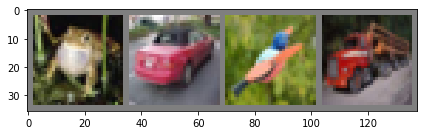

 frog automobile  bird truck


In [6]:
show_image()

